# ARIMA MODEL
Predicting Close from Date

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-25,474.390015,484.869995,468.029999,482.880005,482.880005,3769400
1,2020-09-28,489.109985,492.000000,477.880005,490.649994,490.649994,4773500
2,2020-09-29,489.500000,496.290009,486.529999,493.480011,493.480011,3541500
3,2020-09-30,492.570007,504.630005,489.269989,500.029999,500.029999,4634100
4,2020-10-01,506.029999,529.549988,503.600006,527.510010,527.510010,8153700


In [9]:
df = df[['Close']].copy()
df.describe()
X = np.asanyarray(df)
X

array([[482.880005],
       [490.649994],
       [493.480011],
       [500.029999],
       [527.51001 ],
       [503.059998],
       [520.650024],
       [505.869995],
       [534.659973],
       [531.789978],
       [539.440002],
       [539.809998],
       [554.090027],
       [541.450012],
       [541.940002],
       [530.789978],
       [530.719971],
       [525.419983],
       [489.049988],
       [485.230011],
       [488.279999],
       [488.23999 ],
       [488.929993],
       [486.23999 ],
       [504.209991],
       [475.73999 ],
       [484.119995],
       [487.220001],
       [496.950012],
       [513.76001 ],
       [514.72998 ],
       [470.5     ],
       [480.23999 ],
       [490.76001 ],
       [486.769989],
       [482.839996],
       [479.100006],
       [480.630005],
       [481.790009],
       [484.670013],
       [488.23999 ],
       [476.619995],
       [482.880005],
       [485.      ],
       [491.359985],
       [490.700012],
       [504.579987],
       [503.3

In [10]:
# To check is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print("ADF Statistic: ", result[0])
print("P-Value: ",result[0])

ADF Statistic:  -2.886839094574603
P-Value:  -2.886839094574603


In [11]:
# To find how many times it must be differenced

from pmdarima.arima.utils import ndiffs

ndiffs(df.Close,test="adf")

1

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

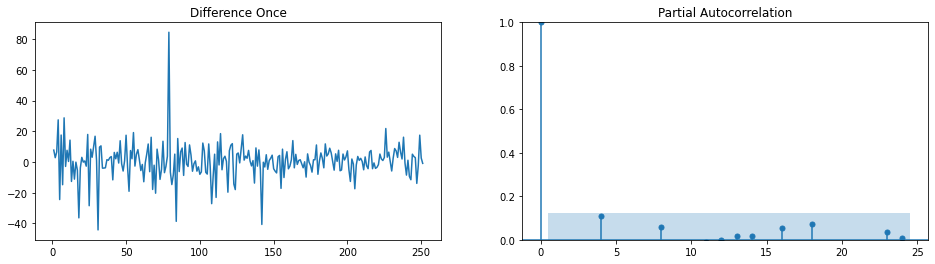

In [13]:
# Finding p term
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0, 1)
plot_pacf(diff,ax=ax2);

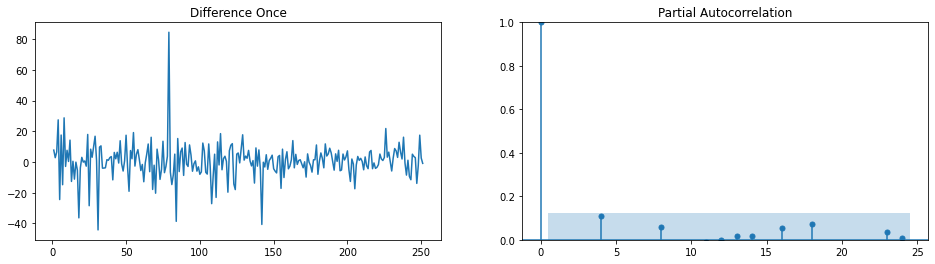

In [14]:
# Finding q term
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0, 1)
plot_pacf(diff,ax=ax2);

Taking p,d, q as 3 1 3

## Arima Model

In [15]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.Close, order=(3,1,3))
result = model.fit(disp=0)

/Users/rishabhrao/Documents/conda_folder/env/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rishabhrao/Documents/conda_folder/env/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inv

In [16]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -961.269
Method:                       css-mle   S.D. of innovations             11.013
Date:                Fri, 01 Oct 2021   AIC                           1938.539
Time:                        00:12:16   BIC                           1966.742
Sample:                             1   HQIC                          1949.888
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2234      0.106      2.102      0.036       0.015       0.432
ar.L1.D.Close    -0.8722      0.037    -23.665      0.000      -0.944      -0.800
ar.L2.D.Close     0.6883      0.050     

### Plotting Residual Errors
Mean should be around 0

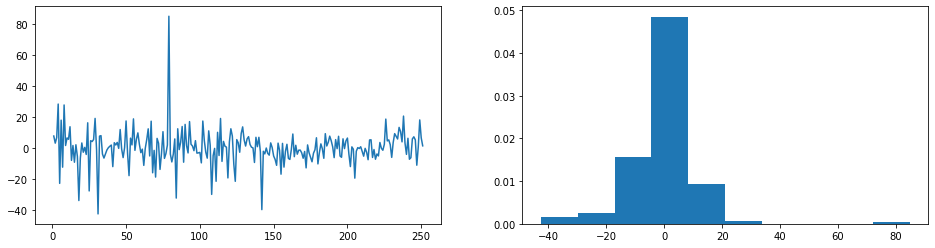

In [17]:
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True);

## Checking predicted vs actual

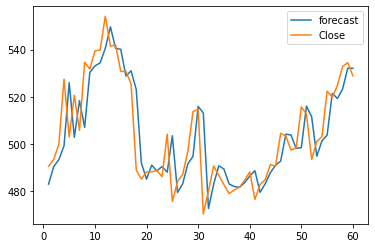

In [18]:
result.plot_predict(start=1,end=60,dynamic=False);

### Saving ARIMA MODEL

In [19]:
result.save('ARIMA_Model.pkl')

In [20]:
from statsmodels.tsa.arima_model import ARIMAResults
loaded = ARIMAResults.load('ARIMA_Model.pkl')
loaded

/Users/rishabhrao/Documents/conda_folder/env/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97323D+00    |proj g|=  5.44707D-03

At iterate    5    f=  3.97307D+00    |proj g|=  7.61302D-04

At iterate   10    f=  3.97306D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     16      1     0     0   1.332D-07   3.973D+00
  F =   3.9730627558467018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=501.505060, expected=501.339996
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.96704D+00    |proj g|=  7.08589D-04

At iterate   10    f=  3.96703D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   4.441D-08   3.967D+00
  F =   3.9670331781814809     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=499.823358, expected=503.859985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96450D+00    |proj g|=  5.48579D-03

At iterate    5    f=  3.96

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=502.125754, expected=499.079987
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95882D+00    |proj g|=  5.45750D-03

At iterate    5    f=  3.95865D+00    |proj g|=  6.91802D-04

At iterate   10    f=  3.95865D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   1.332D-07   3.959D+00
  F =   3.9586520304230173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=499.977557, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=491.107989, expected=494.739990
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95224D+00    |proj g|=  5.36540D-03

At iterate    5    f=  3.95208D+00    |proj g|=  6.94866D-04

At iterate   10    f=  3.95208D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     16      1     0     0   8.882D-08   3.952D+00
  F =   3.9520773656103318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=494.628486, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=491.455328, expected=485.809998
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94443D+00    |proj g|=  5.32858D-03

At iterate    5    f=  3.94427D+00    |proj g|=  7.50244D-04

At iterate   10    f=  3.94427D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   8.882D-08   3.944D+00
  F =   3.9442664647759629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=488.706041, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=488.996688, expected=499.890015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93819D+00    |proj g|=  5.38396D-03

At iterate    5    f=  3.93803D+00    |proj g|=  7.01439D-04

At iterate   10    f=  3.93803D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   4.441D-08   3.938D+00
  F =   3.9380299919623005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=497.769443, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=491.741342, expected=498.339996
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93127D+00    |proj g|=  5.35429D-03

At iterate    5    f=  3.93112D+00    |proj g|=  7.21245D-04

At iterate   10    f=  3.93111D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   4.441D-08   3.931D+00
  F =   3.9311142335418174     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=499.043722, expect

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=497.866884, expected=508.820007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92530D+00    |proj g|=  5.39000D-03

At iterate    5    f=  3.92515D+00    |proj g|=  5.63638D-04

At iterate   10    f=  3.92514D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     16      1     0     0   1.332D-07   3.925D+00
  F =   3.9251441261814453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=507.605668, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.92107D+00    |proj g|=  5.18785D-04

At iterate   10    f=  3.92107D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   4.441D-08   3.921D+00
  F =   3.9210688322274554     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=515.276211, expected=527.070007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92101D+00    |proj g|=  5.61915D-03

At iterate    5    f=  3.92

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.91648D+00    |proj g|=  3.46922D-04

At iterate   10    f=  3.91648D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   8.882D-08   3.916D+00
  F =   3.9164760112986357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=532.416740, expected=528.210022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91431D+00    |proj g|=  5.70437D-03

At iterate    5    f=  3.91

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.90937D+00    |proj g|=  3.14415D-04

At iterate   10    f=  3.90937D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   1.332D-07   3.909D+00
  F =   3.9093676671593349     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=533.691133, expected=541.640015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90805D+00    |proj g|=  5.76192D-03

At iterate    5    f=  3.90

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.90386D+00    |proj g|=  2.13607D-04

At iterate   10    f=  3.90386D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   8.882D-08   3.904D+00
  F =   3.9038635011322236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=530.904124, expected=535.979980
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.90192D+00    |proj g|=  5.71561D-03

At iterate    5    f=  3.90

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.89707D+00    |proj g|=  2.24443D-04

At iterate   10    f=  3.89707D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   0.000D+00   3.897D+00
  F =   3.8970698728363624     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=540.147193, expected=547.950012
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89577D+00    |proj g|=  5.78302D-03

At iterate    5    f=  3.89

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.89376D+00    |proj g|=  4.24105D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      9     12      1     0     0   1.332D-07   3.894D+00
  F =   3.8937633080379483     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=532.273424, expected=532.280029
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89143D+00    |proj g|=  5.67058D-03

At iterate    5    f=  3.89129D+00    |proj g|=  5.18829D-04

At iterate   10    f=  3.89

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.89196D+00    |proj g|=  4.75575D-04

At iterate   10    f=  3.89196D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   0.000D+00   3.892D+00
  F =   3.8919617270405249     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=515.819376, expected=511.769989
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88994D+00    |proj g|=  5.58327D-03

At iterate    5    f=  3.88

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  3.88497D+00    |proj g|=  5.61329D-04

At iterate   10    f=  3.88497D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     14      1     0     0   8.882D-08   3.885D+00
  F =   3.8849689091234940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=515.030318, expected=518.909973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88296D+00    |proj g|=  5.59823D-03

At iterate    5    f=  3.882

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87874D+00    |proj g|=  5.56062D-03

At iterate    5    f=  3.87860D+00    |proj g|=  4.71978D-04

At iterate   10    f=  3.87860D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     15      1     0     0   0.000D+00   3.879D+00
  F =   3.8785978511172510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
predicted=514.546524, expected=517.570007
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=515.649509, expected=510.820007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87234D+00    |proj g|=  5.53420D-03

At iterate    5    f=  3.87221D+00    |proj g|=  4.69447D-04

At iterate   10    f=  3.87221D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   8.882D-08   3.872D+00
  F =   3.8722059837272775     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=511.004084, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=523.313817, expected=520.549988
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86699D+00    |proj g|=  5.56719D-03

At iterate    5    f=  3.86685D+00    |proj g|=  6.18749D-04

At iterate   10    f=  3.86685D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     16      1     0     0   8.882D-08   3.867D+00
  F =   3.8668525135263998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=520.121269, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=516.907900, expected=512.400024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86092D+00    |proj g|=  5.52252D-03

At iterate    5    f=  3.86079D+00    |proj g|=  5.48317D-04

At iterate   10    f=  3.86079D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   1.332D-07   3.861D+00
  F =   3.8607885020407458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=512.123769, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=515.554332, expected=517.919983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85450D+00    |proj g|=  5.54610D-03

At iterate    5    f=  3.85437D+00    |proj g|=  6.42375D-04

At iterate   10    f=  3.85436D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     14      1     0     0   8.882D-08   3.854D+00
  F =   3.8543640950114599     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=517.827350, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=522.050931, expected=543.710022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85596D+00    |proj g|=  5.62843D-03

At iterate    5    f=  3.85583D+00    |proj g|=  6.78790D-04

At iterate   10    f=  3.85583D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   1.332D-07   3.856D+00
  F =   3.8558316155055059     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=540.158358, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=550.814362, expected=553.409973
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85145D+00    |proj g|=  5.80869D-03

At iterate    5    f=  3.85132D+00    |proj g|=  7.56062D-04

At iterate   10    f=  3.85132D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     15      1     0     0   8.882D-08   3.851D+00
  F =   3.8513194795235974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=554.674403, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=550.718464, expected=558.919983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84722D+00    |proj g|=  5.80367D-03

At iterate    5    f=  3.84710D+00    |proj g|=  6.37668D-04

At iterate   10    f=  3.84709D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   8.882D-08   3.847D+00
  F =   3.8470945809233608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=557.694099, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=568.926722, expected=582.070007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84523D+00    |proj g|=  5.94507D-03

At iterate    5    f=  3.84511D+00    |proj g|=  5.26423D-04

At iterate   10    f=  3.84511D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     13      1     0     0   4.441D-08   3.845D+00
  F =   3.8451072384755896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=580.600561, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=588.784569, expected=606.710022
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84537D+00    |proj g|=  6.11431D-03

At iterate    5    f=  3.84525D+00    |proj g|=  1.42419D-03

At iterate   10    f=  3.84524D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   8.882D-08   3.845D+00
  F =   3.8452439665589981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=605.688265, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=597.419050, expected=598.719971
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83998D+00    |proj g|=  6.08575D-03

At iterate    5    f=  3.83986D+00    |proj g|=  1.29732D-03

At iterate   10    f=  3.83985D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   4.441D-08   3.840D+00
  F =   3.8398542429567395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=601.062943, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=579.410102, expected=582.869995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83842D+00    |proj g|=  5.97180D-03

At iterate    5    f=  3.83830D+00    |proj g|=  8.01448D-04

At iterate   10    f=  3.83830D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   4.441D-08   3.838D+00
  F =   3.8382956105811772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=585.349866, expect

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


predicted=589.199303, expected=575.429993
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83552D+00    |proj g|=  5.89986D-03

At iterate    5    f=  3.83540D+00    |proj g|=  1.06501D-03

At iterate   10    f=  3.83540D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   8.882D-08   3.835D+00
  F =   3.8353953425583849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
predicted=579.083211, expect

 This problem is unconstrained.
 This problem is unconstrained.


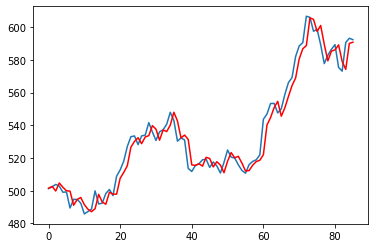

In [21]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()